# Stable Diffusion

[Stable Diffusion](https://en.wikipedia.org/wiki/Stable_Diffusion) is a sophisticated text-to-image model created by [Stability.ai](https://stability.ai/). It is a latent diffusion model that's capable of generating images from text prompts, modifying images guided by text prompts, inpainting, outpainting, and more. Stable Diffusion was trained on more than 2 billion text-image pairs from the [LAION-5B](https://laion.ai/blog/laion-5b/) dataset. The first version was released as open source in 2022, and several versions have been produced since. In addition, several companies such as [Midjourney]() have fine-tuned Stable Diffusion for specific tasks and made them available to the public, usually for a fee.

![](Images/stable-diffusion.png)

[KerasCV](https://keras.io/keras_cv/) contains Keras implementations of Stable Diffusion V1 and V2. Let's use these models to perform some deep-learning image magic. The following examples don't require a GPU, but if you run them on CPU, it may require several minutes to generate a single image. Expect inpainting to take even longer.

You do not have Waymo Open Dataset installed, so KerasCV Waymo metrics are not available.
By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
50/50 [==============================] - 795s 15s/step


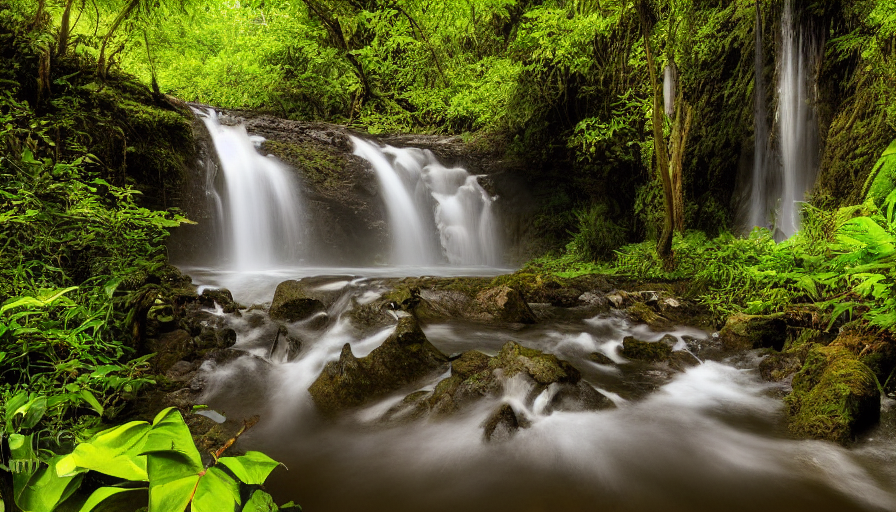

In [1]:
from PIL import Image
from keras_cv.models import StableDiffusion

prompt = 'Photograph of a jungle stream with a waterfall in the background and ' \
         'rays of sunlight piercing the clouds'

model = StableDiffusion(img_width=900, img_height=500)
image = model.text_to_image(prompt, batch_size=1)
display(Image.fromarray(image[0]))

Use Stable Diffusion V2 to generate a similar image.

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL++-M license at https://github.com/Stability-AI/stablediffusion/main/LICENSE-MODEL
50/50 [==============================] - 654s 13s/step


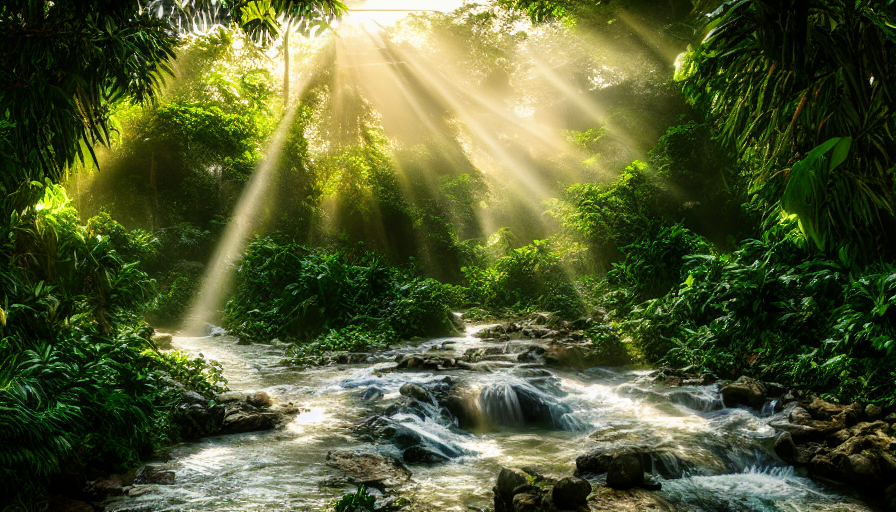

In [2]:
from keras_cv.models import StableDiffusionV2

prompt = 'Photograph of a jungle stream with a waterfall in the background and ' \
         'rays of sunlight piercing the clouds'

model = StableDiffusionV2(img_width=900, img_height=500)
image = model.text_to_image(prompt, batch_size=1)
display(Image.fromarray(image[0]))

Stable Diffusion supports inpainting, too. Inpainting fills in missing parts of an image, and it's frequently used to remove unwanted objects from photos. Here's an example. Suppose you wanted to remove the people from the left side of this photo:

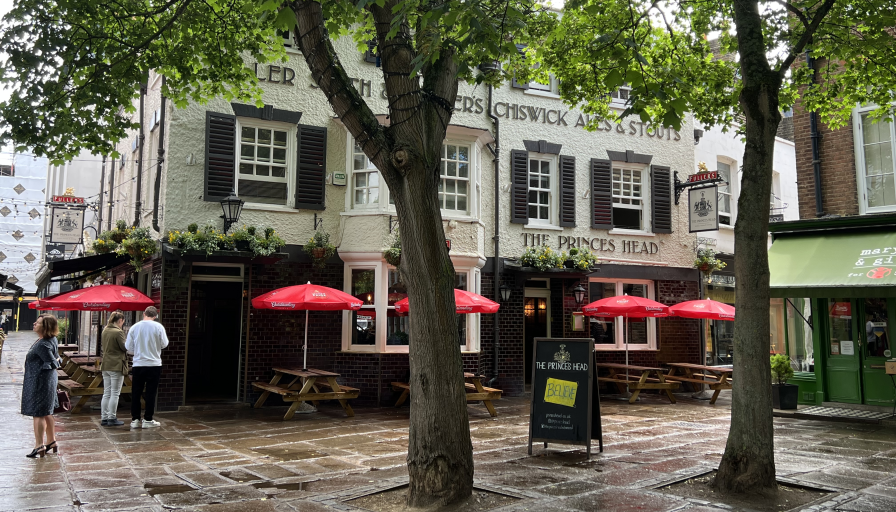

In [3]:
image = Image.open('Data/lasso.png')
display(image)

Here's the same image with transparent pixels denoting the region to be inpainted:

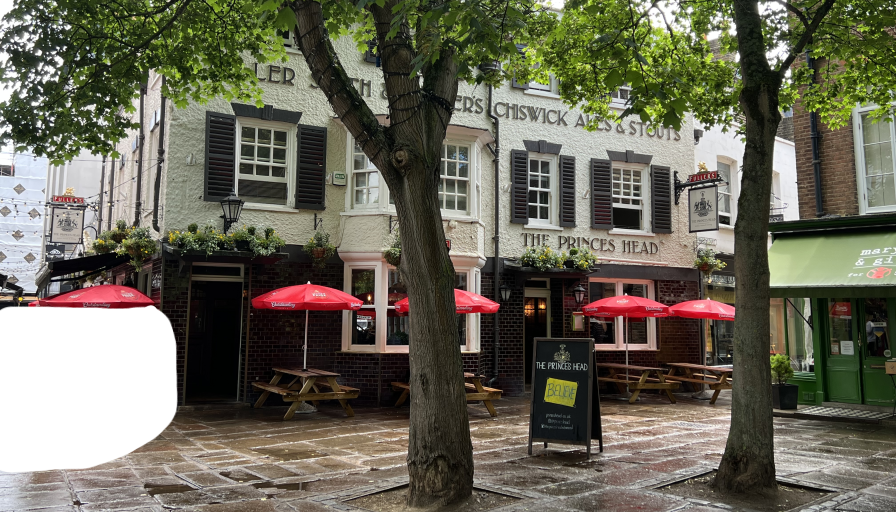

In [4]:
image = Image.open('Data/lasso-mask.png')
display(image)

Stable Diffusion's `inpaint` method is capable of removing objects from photos. It accepts a 3-channel RGB image and a mask consisting of 1s and 0s with 0s indicating where inpainting should occur. This example generates the mask from a PNG file with transparent pixels. The width and height of the mask and image must be the same. Although it's not documented, the width and height of the image (and the mask) must also be multiples of 32. 

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL++-M license at https://github.com/Stability-AI/stablediffusion/main/LICENSE-MODEL
25/25 [==============================] - 498s 19s/step


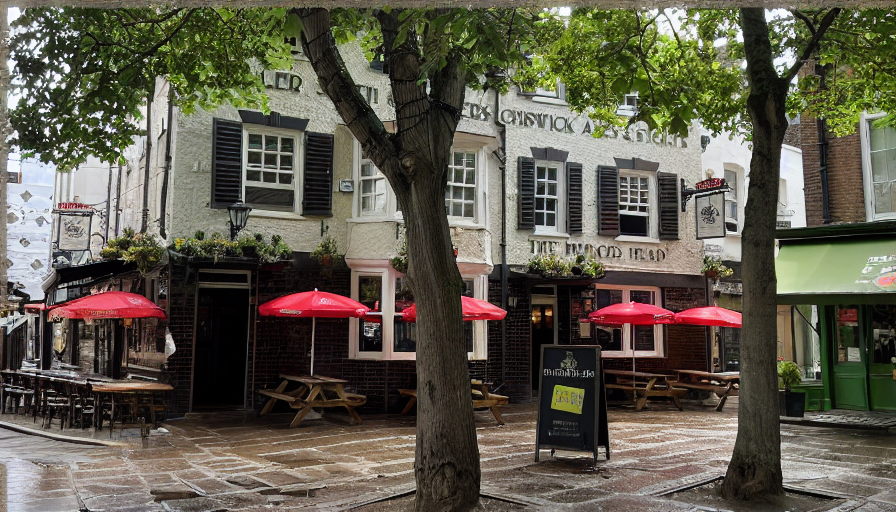

In [5]:
import numpy as np

prompt = 'Photo of an English pub'

# Load the image to be edited
photo = np.array(Image.open('Data/lasso.png'))
photo = photo.reshape(1, photo.shape[0], photo.shape[1], photo.shape[2]) # (1, 512, 896, 3)

# Load the image containing transparent pixels denoting regions
# to be inpainted and generate a mask consisting of 1s and 0s, where
# 0s denote regions to be inpainted
image = Image.open('Data/lasso-mask.png')
alpha = np.array(image)[:, :, 3] # Extract values in the alpha channel
mask = np.where(alpha > 0, 1, 0).reshape(1, alpha.shape[0], alpha.shape[1]) # (1, 512, 896)

# Use Stable Diffusion V2 to do the inpainting
model = StableDiffusionV2(img_width=896, img_height=512)
image = model.inpaint(prompt, image=photo, mask=mask, batch_size=1)
display(Image.fromarray(image[0]))

The inpainting isn't perfect, but it's not bad, either. Remember that due to stochasticity built into the inference process, you frequently have to run a diffusion model several times to get the results that you want. You can also experiment with different prompts in an effort to drive those results.